In [40]:
## importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
## loading data set
bank_1=pd.read_csv('bank-full.csv')

In [42]:
## chaking shape
bank_1.shape

(45211, 17)

In [43]:
## chaking info
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
## chaking data set
bank_1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [45]:
bank_1.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [46]:
bank_1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [47]:
## as there is many colum which have dosent meaning so we drrop all that colums
bank_2=bank_1.drop(['job','marital','education','contact','day','month','poutcome'],axis=1)

In [48]:
bank_2.head(10)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,no,2143,yes,no,261,1,-1,0,no
1,44,no,29,yes,no,151,1,-1,0,no
2,33,no,2,yes,yes,76,1,-1,0,no
3,47,no,1506,yes,no,92,1,-1,0,no
4,33,no,1,no,no,198,1,-1,0,no
5,35,no,231,yes,no,139,1,-1,0,no
6,28,no,447,yes,yes,217,1,-1,0,no
7,42,yes,2,yes,no,380,1,-1,0,no
8,58,no,121,yes,no,50,1,-1,0,no
9,43,no,593,yes,no,55,1,-1,0,no


# EDA

In [49]:
## converting catagorical into int
bank_2['default'] = bank_2['default'].map( 
                   {'yes':1 ,'no':0}) 
bank_2['housing'] = bank_2['housing'].map( 
                   {'yes':1 ,'no':0}) 
bank_2['loan'] = bank_2['loan'].map( 
                   {'yes':1 ,'no':0}) 
bank_2['Target'] = bank_2['Target'].map( 
                   {'yes':1 ,'no':0}) 

In [50]:
bank_2.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0


In [51]:
bank_2['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

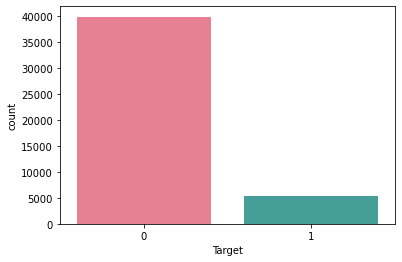

In [52]:
## Graphical reprentation 
sns.countplot(x="Target", data=bank_2, palette="husl")
plt.show()

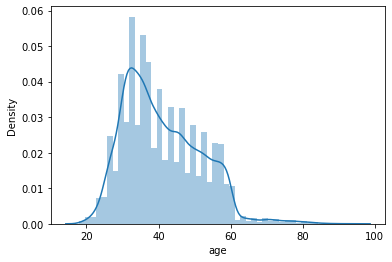

In [53]:
sns.distplot(bank_2['age'])
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='age'>

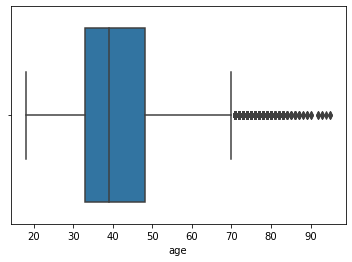

In [54]:
## chaking for outliers
sns.boxplot(bank_2['age'])

In [55]:
## Function to find wishker
def outliers(bank_2, feature):
    Q1= bank_2[feature].quantile(0.25)
    Q3 = bank_2[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_2, "age")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  70.5
Lower Whisker:  10.5


In [56]:
## to find outliers
bank_2[(bank_2['age'] < lower) | (bank_2['age'] > upper)].shape

(487, 10)

In [57]:
## Droping outliers
bank_3= bank_2[(bank_2['age'] > lower) & (bank_2['age'] < upper)]

<AxesSubplot:xlabel='age'>

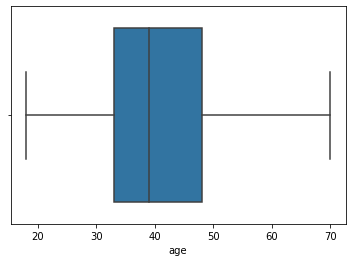

In [58]:
sns.boxplot(bank_3['age'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

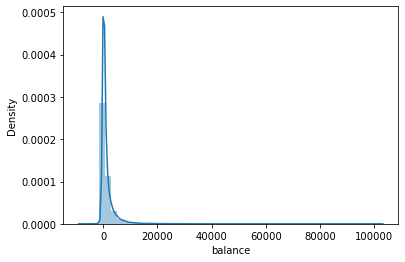

In [59]:
## Chaking for the balance
sns.distplot(bank_3['balance'])

<AxesSubplot:xlabel='balance'>

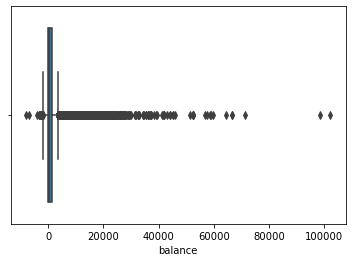

In [60]:
## Boxplot
sns.boxplot(bank_3['balance'])

In [61]:
## Function to find wishker
def outliers(bank_3, feature):
    Q1= bank_2[feature].quantile(0.25)
    Q3 = bank_2[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_3, "balance")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  3462.0
Lower Whisker:  -1962.0


In [62]:
## to find outliers
bank_3[(bank_3['balance'] < lower) | (bank_3['balance'] > upper)].shape

(4616, 10)

In [63]:
## Droping outliers
bank_4= bank_3[(bank_3['balance'] > lower) & (bank_3['balance'] < upper)]

<AxesSubplot:xlabel='balance'>

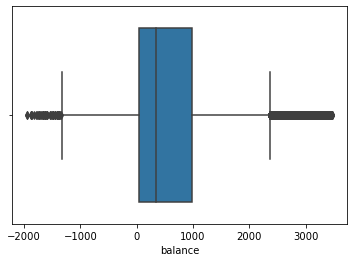

In [64]:
sns.boxplot(bank_4['balance'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

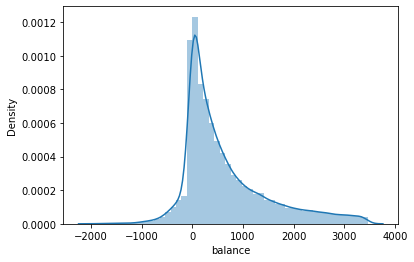

In [79]:
sns.distplot(bank_4['balance'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

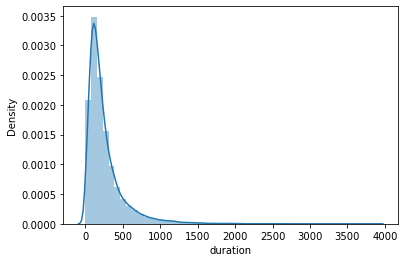

In [80]:
## Chaking for duration
sns.distplot(bank_4['duration'])        

<AxesSubplot:xlabel='duration'>

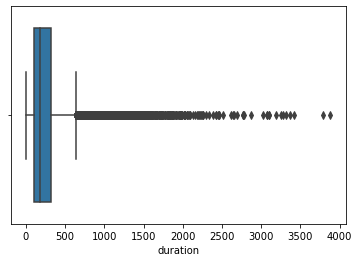

In [81]:
## boxplot
sns.boxplot(bank_4['duration'])

In [83]:
##  Function to find wishker
def outliers(bank_4, feature):
    Q1= bank_4[feature].quantile(0.25)
    Q3 = bank_4[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_4, "duration")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  634.5
Lower Whisker:  -217.5


In [84]:
## to find outliers
bank_4[(bank_4['duration'] < lower) | (bank_4['duration'] > upper)].shape

(2884, 10)

In [85]:
## Droping outliers
bank_5= bank_4[(bank_4['duration'] > lower) & (bank_4['duration'] < upper)]

<AxesSubplot:xlabel='duration', ylabel='Density'>

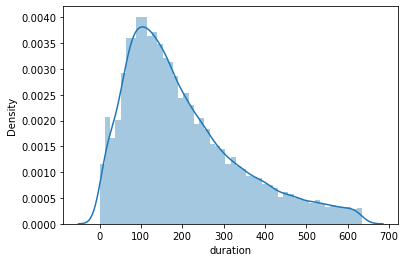

In [86]:
sns.distplot(bank_5['duration'])

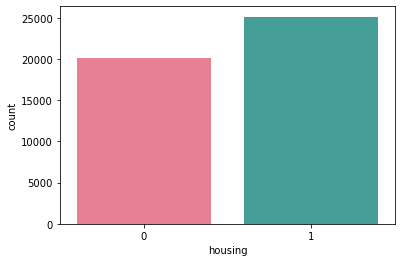

In [88]:
## chaking for the housing
sns.countplot(x="housing", data=bank_2, palette="husl")
plt.show()

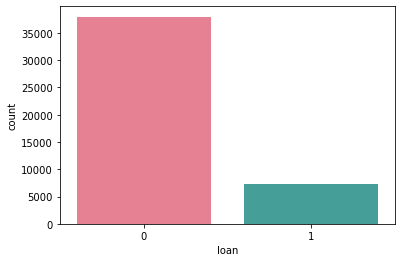

In [89]:
## chaking for the loan
sns.countplot(x="loan", data=bank_2, palette="husl")
plt.show()

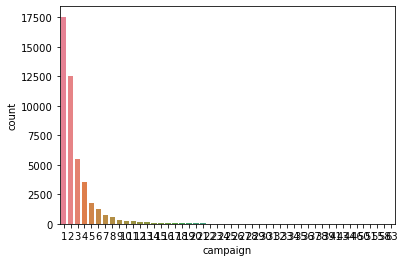

In [91]:
## chaking for the campagin
sns.countplot(x="campaign", data=bank_2, palette="husl")
plt.show()

<AxesSubplot:xlabel='campaign', ylabel='Density'>

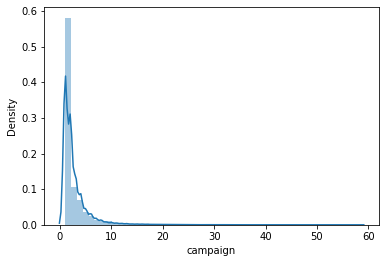

In [92]:
## histogram
sns.distplot(bank_4['campaign'])

<AxesSubplot:xlabel='campaign'>

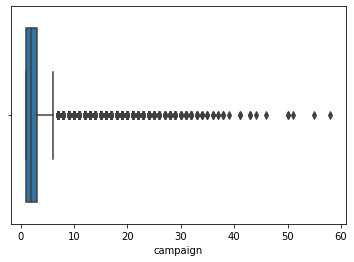

In [93]:
sns.boxplot(bank_4['campaign'])

In [94]:
##  Function to find wishker
def outliers(bank_5, feature):
    Q1= bank_5[feature].quantile(0.25)
    Q3 = bank_5[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_5, "campaign")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  6.0
Lower Whisker:  -2.0


In [95]:
## to find outliers
bank_5[(bank_5['campaign'] < lower) | (bank_5['campaign'] > upper)].shape

(2596, 10)

In [96]:
## Droping outliers
bank_6= bank_5[(bank_5['campaign'] > lower) & (bank_5['campaign'] < upper)]

In [97]:
bank_6.shape

(33564, 10)

<AxesSubplot:xlabel='campaign', ylabel='Density'>

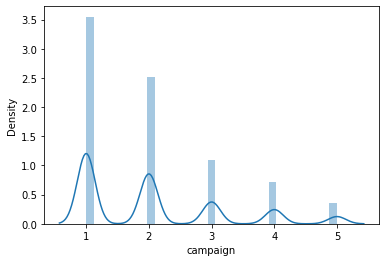

In [98]:
sns.distplot(bank_6['campaign'])

<AxesSubplot:xlabel='campaign'>

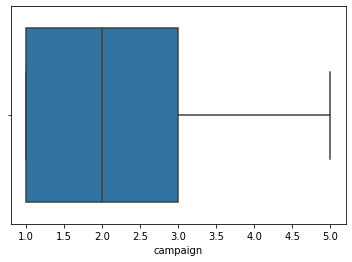

In [99]:
sns.boxplot(bank_6['campaign'])

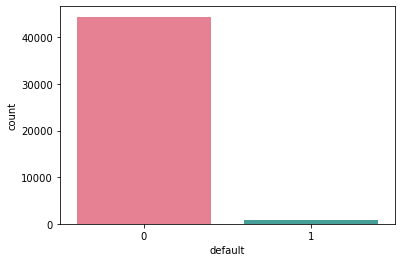

In [100]:
## chaking for the default
sns.countplot(x="default", data=bank_2, palette="husl")
plt.show()

<AxesSubplot:>

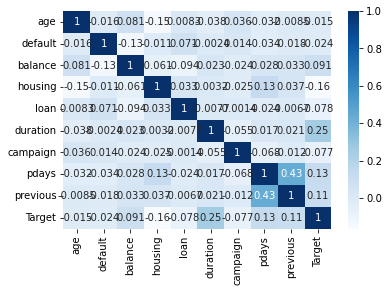

In [101]:
## chaking correlation using heatmap
corr = bank_6.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [103]:
bank_6.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0


# Feature engennering using recursive feature elemination

In [112]:
# Feature Extraction with RFE
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = bank_6.drop(['Target'],axis=1)
Y = bank_6['Target']
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)

In [113]:
#Num Features: 
fit.n_features_

4

In [114]:
#Selected Features:
fit.support_

array([False,  True, False,  True,  True, False,  True, False, False])

In [115]:
# Feature Ranking:
fit.ranking_

array([3, 1, 6, 1, 1, 4, 1, 5, 2])

## From above choosing 5 best features for our model to get desired output 

In [159]:
x=bank_6.drop(['balance','duration','pdays','Target'],axis=1)
y=bank_6['Target']

In [160]:
x.head()

,age,default,housing,loan,campaign,previous
0,58,0,1,0,1,0
1,44,0,1,0,1,0
2,33,0,1,1,1,0
3,47,0,1,0,1,0
4,33,0,0,0,1,0


In [161]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

# Model building

In [162]:
## Splitting the data into train & test
from sklearn.model_selection import train_test_split

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [166]:
#Predict for X dataset
y_pred = classifier.predict(x_test)

In [167]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[10143    15]
 [  909    10]]


In [169]:
## Chaking accuracy
from sklearn.metrics import accuracy_score

In [170]:
score =accuracy_score(y_test,y_pred)

In [171]:
score

0.916583912611718

## From above our model is 0.916583912611718 accurate

In [172]:
## chaking for prescion
from sklearn.metrics import precision_score

In [173]:
score2=precision_score(y_test,y_pred)

In [174]:
score2

0.4

## From above our model prescion is 0.4074074074074074

In [175]:
## chaking for the recall
from sklearn.metrics import recall_score

In [176]:
score3=recall_score(y_test,y_pred)

In [177]:
score3

0.01088139281828074

In [178]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10158
           1       0.40      0.01      0.02       919

    accuracy                           0.92     11077
   macro avg       0.66      0.50      0.49     11077
weighted avg       0.87      0.92      0.88     11077



## From above our model recall is 0.011969532100108813 it is less because our true positive are more

# ROC-AUC Curve

Text(0, 0.5, 'True Positive Rate')

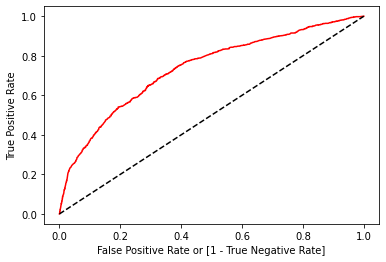

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [180]:
auc

0.5047023620913613

## Building model2

In [181]:
x1=bank_6.drop(['age','balance','duration','pdays','previous','Target'],axis=1)
y1=bank_6['Target']

In [182]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

In [183]:
## fitting the model
classifier.fit(x1_train,y1_train)

LogisticRegression()

In [184]:
#Predict for X dataset
y1_pred = classifier.predict(x1_test)

In [185]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test,y1_pred)
print (confusion_matrix)

[[10158     0]
 [  919     0]]


In [186]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10158
           1       0.00      0.00      0.00       919

    accuracy                           0.92     11077
   macro avg       0.46      0.50      0.48     11077
weighted avg       0.84      0.92      0.88     11077



Text(0, 0.5, 'True Positive Rate')

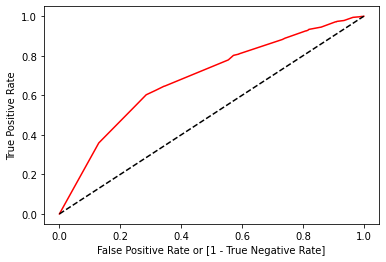

In [187]:
fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba (x1_test)[:,1])

auc = roc_auc_score(y1_test, y1_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [188]:
auc

0.5

# Conclusion

## from above our model1& model2 gives 92% accuracy & also giving 0.52 auc so our model is well performed as accuracy is high.